# CEO-REQUEST CHALLENGE

> Should Olist remove underperforming sellers from its marketplace?

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data

from olist.data import Olist
olist=Olist()
data=olist.get_data()  ## is dict
matching_table = olist.get_matching_table()

#print(" ** matching_table.shape  ** ", matching_table.shape)
#print(list(data.keys()))

In [3]:
# Import olist seller
from olist.seller import Seller
seller=Seller()
sellers=seller.get_training_data() 

#print(" ** sellers.shape  ** ", sellers.shape)

In [4]:
# Import orders training_set 
from olist.order import Order
order=Order()
orders=order.get_training_data() ## is dict
#print(" ** orders.shape  ** ", orders.shape)

## Problem statement

- The `revenues` it brings
- The `costs` associated with all its bad reviews
- The resulting `profits` (revenues - costs)

**review_score	------> cost (BRL)**
- 1 star	------>       100
- 2 stars     ------>   	50
- 3 stars     ------>   	40
- 4 stars     ------>    	0
- 5 stars     ------>       0

<span style="color:blue">  Solution : We suggest to not remove underperforming sellers from its marketplace, but to increase price rate to 15% </span>

To analyse the impact of removing the worse sellers from Olist's marketplace, we can start with a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? For that:

Step ① Compute, for each `seller_id`, and cumulated since the beginning:
- The `revenues` it brings
- The `costs` associated with all its bad reviews
- The resulting `profits` (revenues - costs)
- The number of `orders` (it will impact overall IT costs)


Step ② We can then sort sellers by increasing profits for Olist, and for each number of sellers to remove, compute the financial impact it would have made had they never been accepted on the platform. We may find an optimal number of sellers to remove that maximizes Olist's profit margin

### Step 1

#### The revenues for all sellers and per seller

- Import orders training_set ----> from olist.order import Order
- order=Order()  ------ > orders=order.get_training_data() 

- from olist.seller import Seller
- seller=Seller()    --------->   sellers=seller.get_training_data() 

In [5]:
# Import olist seller
from olist.seller import Seller
seller=Seller(); sellers=seller.get_training_data() 

In [6]:
sellers.head(2)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,1.514329,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,3,3,1.000,218.70
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.155190,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,40,41,1.025,11703.07


Revenues :

- Olist takes a 10% cut on the product price (excl. freight) of each order delivered.
- Olist charges 80 BRL by month per seller.

##### Data

**Columns of interest**

In [10]:
mask_columns = [ 'seller_id', 'date_first_sale', 'date_last_sale', 'sales' , 'n_orders'] 
sellers_1 = sellers[mask_columns].copy()
sellers_1.head(2)

,seller_id,date_first_sale,date_last_sale,sales,n_orders
0,3442f8959a84dea7ee197c632cb2df15,2017-05-05 16:25:11,2017-08-30 12:50:19,218.70,3
1,d1b65fc7debc3361ea86b5f14c68d2e2,2017-03-29 02:10:34,2018-06-06 20:15:21,11703.07,40


In [14]:
sellers_1['active_months'] = \
          round(
    (sellers_1['date_last_sale'] - sellers_1['date_first_sale']) / np.timedelta64(1,'M'), 2)

sellers_1['revenues'] = round( sellers_1['sales'].map(lambda x : .1*x) \
                       + (sellers_1['active_months']*80), 2)
sellers_1.head(2)

,seller_id,date_first_sale,date_last_sale,sales,n_orders,active_months,revenues
0,3442f8959a84dea7ee197c632cb2df15,2017-05-05 16:25:11,2017-08-30 12:50:19,218.70,3,3.84,329.07
1,d1b65fc7debc3361ea86b5f14c68d2e2,2017-03-29 02:10:34,2018-06-06 20:15:21,11703.07,40,14.28,2312.71


In [15]:
sellers_1.iloc[-1, :]

seller_id          9e25199f6ef7e7c347120ff175652c3b
date_first_sale                 2017-03-27 10:10:27
date_last_sale                  2017-03-27 10:10:27
sales                                          12.5
n_orders                                          1
active_months                                   0.0
revenues                                       1.25
Name: 2969, dtype: object

In [16]:
total_revenues = sellers_1['revenues'].sum()

In [17]:
print("Revenues for all sellers :", round(total_revenues, 2))

Revenues for all sellers : 2787749.33


##### Result : revenues per seller

Total revenues for all sellers:<span style="color:blue">  2_787_744   BRL</span>

Text(0, 0.5, 'revenues')

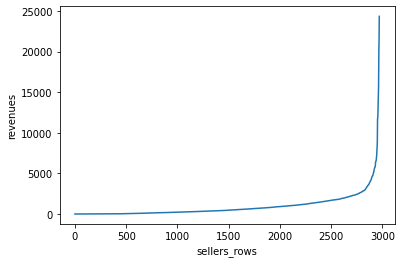

In [26]:
sorted_sellers_1 = sellers_1.sort_values(by='revenues').reset_index()

sorted_sellers_1.revenues.plot()
plt.xlabel('sellers_rows'); plt.ylabel('revenues')

In [12]:
round( sellers_1[['seller_id', 'revenues']] , 2) \
                        .sort_values(by = 'revenues') \
                        .head(3)  

,seller_id,revenues
2241,77128dec4bec4878c37ab7d6169d6f26,0.65
2016,1fa2d3def6adfa70e58c276bb64fe5bb,0.69
2314,702835e4b785b67a084280efca355756,0.76


In [13]:
round( sellers_1[['seller_id', 'revenues']] , 2 ) \
                        .sort_values(by = 'revenues') \
                        .tail(3) 

,seller_id,revenues
2360,4a3ca9315b744ce9f8e9374361493884,21613.96
868,53243585a1d6dc2643021fd1853d8905,23218.33
2506,4869f7a5dfa277a7dca6462dcf3b52b2,24354.20


##### Cumulative sum of revenues

Text(0, 0.5, 'Cumulative sum of revenues')

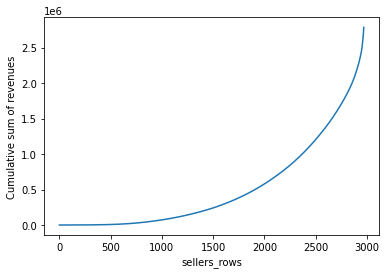

In [29]:
np.cumsum(sorted_sellers_1.revenues).plot();
plt.xlabel('sellers_rows'); plt.ylabel('Cumulative sum of revenues')

#### Total costs -  bad reviews

*We will assume that we have an estimate measure of the monetary cost for each bad review:

**review_score	------> cost (BRL)**
- 1 star	------>       100
- 2 stars     ------>   	50
- 3 stars     ------>   	40
- 4 stars     ------>    	0
- 5 stars     ------>       0


- from olist.data import Olist
- olist=Olist()
- data=olist.get_data()  ## is dict
- matching_table = olist.get_matching_table() ----> matching_table.shape :  (114100, 5)

##### Data 

In [30]:
# Import data

from olist.data import Olist
olist=Olist()
matching_table = olist.get_matching_table()  # .shape  = (114100, 5)

In [31]:
matching_table[['order_id', 'seller_id']].head(2)

,order_id,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9
1,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962


In [32]:
# Import orders training_set 
from olist.order import Order
order=Order()
orders=order.get_training_data() # .shape = (97007, 12)

In [33]:
mask_columns = [ 'order_id', 'review_score']
orders_1 = orders[mask_columns].copy()
orders_1.head(2)

,order_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,4
1,53cdb2fc8bc7dce0b6741e2150273451,4


In [34]:
# Merging  matching_table  and  orders_1   tables

costs = matching_table[['order_id','seller_id']] \
                      .merge( orders_1 , on = 'order_id')
costs.head(3)

,order_id,seller_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,4
1,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,4
2,47770eb9100c2d0c44946d9cf07ec65d,4869f7a5dfa277a7dca6462dcf3b52b2,5


In [35]:
def review_to_price(review_score): 
    d = {1 : 100, 2 : 50, 3 : 40, 4 : 0, 5: 0}
    return d[review_score]

##### Result : total costs

In [36]:
costs['costs'] = costs['review_score'].map(review_to_price)
costs_1 = costs[['seller_id', 'costs']].copy()  # , 'review_score'
costs_1.tail(3)

,seller_id,costs
112151,a1043bafd471dff536d0c462352beb48,50
112152,a1043bafd471dff536d0c462352beb48,50
112153,ececbfcff9804a2d6b40f589df8eef2b,0


In [37]:
print("Costs for all sellers: ", costs_1.costs.sum() , "BRL")

Costs for all sellers:  1894610 BRL


Costs for all sellers:<span style="color:blue">  1_894_610  </span>  BRL

#### Costs per seller - "bad reviewes"

- **Result :  costs per seller**

In [22]:
#costs_1.groupby('seller_id').agg({'costs' : 'sum'}).reset_index()

In [42]:
olist_costs = costs_1.groupby('seller_id').sum().reset_index()

olist_costs.sort_values(by = 'costs') .head(3)

,seller_id,costs
1484,7cf4ea70955b00d6b3c22542598e2715,0
869,4b90495391ac0bd181a80a459df1e718,0
2065,b2eecf5ea250510da76590ca79d60e5d,0


In [44]:
olist_costs.sort_values(by = 'costs') .tail(3)

,seller_id,costs
1190,6560211a19b47992c3666cc44a7e94c0,38660
1480,7c67e1448b00f6e969d365cea6b010ab,44350
858,4a3ca9315b744ce9f8e9374361493884,45160


*To check : The costs associated with all bad reviewes :*

In [45]:
# The cost associated with all this
total_costs = olist_costs['costs'].sum()
print("The costs associated with all this : ", total_costs )

The costs associated with all this :  1894610


Text(0, 0.5, 'Costs')

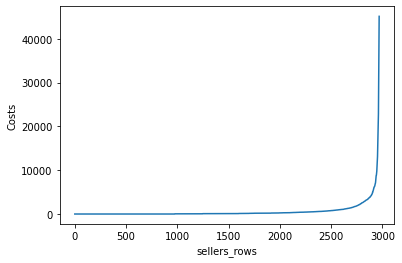

In [47]:
sorted_costs = olist_costs.sort_values(by='costs').reset_index()
sorted_costs.costs.plot();
plt.xlabel('sellers_rows'); plt.ylabel('Costs')

##### Cumulative sum of Costs

Text(0, 0.5, 'Cumulative sum of Costs')

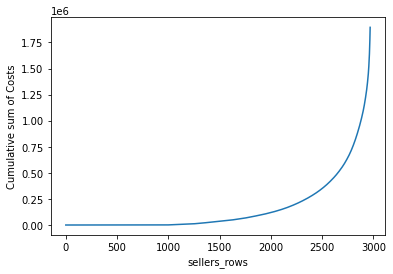

In [48]:
np.cumsum(sorted_costs.costs).plot();
plt.xlabel('sellers_rows'); plt.ylabel('Cumulative sum of Costs')

##### Plot : Costs vs. Revenues 

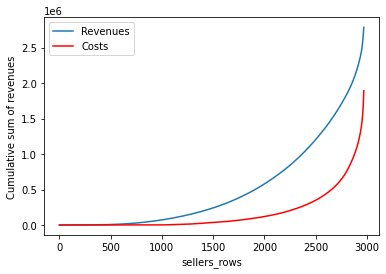

In [52]:
# Revenues
np.cumsum(sorted_sellers_1.revenues).plot( label ='Revenues');
plt.xlabel('sellers_rows'); plt.ylabel('Cumulative sum of revenues')
# Costs
np.cumsum(sorted_costs.costs).plot(color = 'r', label = 'Costs');
#plt.xlabel('sellers_rows'); plt.ylabel('Cumulative sum of Costs')
plt.legend()

#### The total resulting `profits` (revenues - costs)

In [53]:
print( " Total Revenues : ", round(total_revenues, 2))
print( " Total Costs : ", round(total_costs, 2))

profits =  total_revenues - total_costs
print( " The total resulting profits : ", round(profits, 2))

 Total Revenues :  2787749.33
 Total Costs :  1894610
 The total resulting profits :  893139.33


#### The resulting profits per seller :

- olist_costs table : there are 2 columns : 'seller_id' and 'costs'
- sellers_1 table: there are 6 columns : 
- -> 'seller_id', 'date_first_sale',
- -> 'date_last_sale', 'sales',
- -> 'active_months', 'revenues'

##### Data 

In [54]:
sellers_1.head(1)

,seller_id,date_first_sale,date_last_sale,sales,n_orders,active_months,revenues
0,3442f8959a84dea7ee197c632cb2df15,2017-05-05 16:25:11,2017-08-30 12:50:19,218.7,3,3.84,329.07


In [55]:
olist_costs.head(1)

,seller_id,costs
0,0015a82c2db000af6aaaf3ae2ecb0532,100


##### Results 

In [56]:
profits_seller = sellers_1.merge(olist_costs, on = 'seller_id')

# we only keep the columns of interest
profits_seller = profits_seller[ ['seller_id', 
                                  'n_orders', 'revenues',
                                  'costs' , 'active_months' , 'sales' ] ]

# we create a new column profits
profits_seller['profits'] = profits_seller['revenues'] - profits_seller['costs']

In [63]:
sorted_profits = profits_seller .sort_values(by = 'profits').reset_index()
sorted_profits.head(2)

,index,seller_id,n_orders,revenues,costs,active_months,sales,profits
0,453,1f50f920176fa81dab994f9023523100,1404,12037.92,38340,16.80,106939.21,-26302.08
1,769,6560211a19b47992c3666cc44a7e94c0,1854,13797.68,38660,18.34,123304.83,-24862.32


In [64]:
sorted_profits.tail(2)

,index,seller_id,n_orders,revenues,costs,active_months,sales,profits
2968,67,7e93a43ef30c4f03f38b393420bc753a,336,19337.59,3360,21.18,176431.87,15977.59
2969,868,53243585a1d6dc2643021fd1853d8905,358,23218.40,5450,11.76,222776.05,17768.40


In [65]:
print(" The resulting profits for all sellers : ", round( sorted_profits.profits.sum(), 2) )

 The resulting profits for all sellers :  893139.33


Text(0, 0.5, 'Profits')

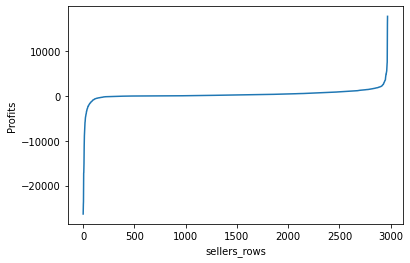

In [66]:
sorted_profits.profits.plot()
plt.xlabel('sellers_rows'); plt.ylabel('Profits')

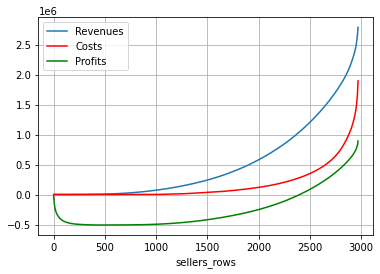

In [68]:
# Revenues
np.cumsum(sorted_sellers_1.revenues).plot( label ='Revenues');
plt.xlabel('sellers_rows'); 
# Costs
np.cumsum(sorted_costs.costs).plot(color = 'r', label = 'Costs');
# Profits
np.cumsum(sorted_profits.profits).plot(color = 'green', label = 'Profits');

plt.legend()
plt.grid("on")

In [84]:
Pr = np.cumsum(sorted_profits.profits)
print ( round( 100*(len(np.where(Pr <0)[0]) / len(Pr)), 2), " % of sellers with negative profits ")

80.81  % of sellers with negative profits 


In [87]:
np.where(Pr > 0)[0][0]

2400

In [93]:
bad_sellers = sorted_profits.iloc[:2400, :].copy()
bad_sellers.head(2)

,index,seller_id,n_orders,revenues,costs,active_months,sales,profits
0,453,1f50f920176fa81dab994f9023523100,1404,12037.92,38340,16.80,106939.21,-26302.08
1,769,6560211a19b47992c3666cc44a7e94c0,1854,13797.68,38660,18.34,123304.83,-24862.32


In [94]:
good_sellers = sorted_profits.iloc[2400:, :].copy()
good_sellers.head(2)

,index,seller_id,n_orders,revenues,costs,active_months,sales,profits
2400,2667,a1474fd46fd3430168f7ec202da39408,12,913.65,100,7.98,2752.50,813.65
2401,752,f680f85bee2d253556ac91be391d2c82,45,1374.39,560,10.70,5183.92,814.39


In [98]:
bad_sellers['new_revenues'] = bad_sellers['sales'].map(lambda x : .15*x) \
                       + bad_sellers['active_months']*80

bad_sellers['new_profits'] = bad_sellers['new_revenues'] - bad_sellers['costs']

bad_sellers.head(2)


,index,seller_id,n_orders,revenues,costs,active_months,sales,profits,new_revenues,new_profits
0,453,1f50f920176fa81dab994f9023523100,1404,12037.92,38340,16.80,106939.21,-26302.08,17384.8815,-20955.1185
1,769,6560211a19b47992c3666cc44a7e94c0,1854,13797.68,38660,18.34,123304.83,-24862.32,19962.9245,-18697.0755


In [101]:

print ( round( 100*(
    len(np.where(bad_sellers.new_profits >0)[0]
                       ) / len(bad_sellers.new_profits)), 2), " % of negative profits become positive ")

85.12  % of negative profits become positive 


In [120]:
neg_1 = (80.81/ 100) * len(Pr)
pos_1 = (1 - (80.81/ 100)) * len(Pr)

pos = pos_1 + (85.12/ 100)  * neg_1
print( round(neg_1), "sellers with negative profits")
print( round(pos_1), "sellers with positive profits")
print("")
print( round(pos), "sellers become with positive profits after applying 15%  \
      of sales on sellers with bad reviewes scores")
print(len(Pr) - round(pos), "sellers remain with negative profits after applying 15%  \
      of sales on sellers with bad reviewes scores")

2400 sellers with negative profits
570 sellers with positive profits

2613 sellers become with positive profits after applying 15%        of sales on sellers with bad reviewes scores
357 sellers remain with negative profits after applying 15%        of sales on sellers with bad reviewes scores


2970

In [110]:
bad_sellers.new_profits.iloc[200:]

200     -182.9795
201      398.6920
202      -89.3900
203     -154.8770
204      180.7825
          ...    
2395    1010.9500
2396     950.6950
2397     959.0550
2398     827.6500
2399     878.4150
Name: new_profits, Length: 2200, dtype: float64

#### Profits incl. IT costs

In [33]:
#The IT department also told you that since the birth of the marketplace,
#cumulated IT costs have amounted to 500,000 BRL.

IT_costs = 500_000
print("The final resulting profits : ",  round(profits - IT_costs, 2))

The final resulting profits :  393134.21


### Recap 

- Recap :
    - Revenues :  <span style="color:blue">  2_787_744    BRL</span>
    - Costs "bad reviews" :  <span style="color:blue">  1_894_610    BRL</span>
    - The resulting profits for all sellers :  <span style="color:blue">  893_134   BRL</span>
    - IT_costs :  <span style="color:blue">  500_000    BRL</span>
    - The final resulting profits :   <span style="color:blue">  393_134    BRL</span> 

#### The number of orders

In [34]:
profits_seller.head(3)  # --> profits_seller.shape  = (2970, 7)

,seller_id,n_orders,revenues,costs,active_months,sales,profits
0,3442f8959a84dea7ee197c632cb2df15,3,328.999525,140,3.839119,218.70,188.999525
1,d1b65fc7debc3361ea86b5f14c68d2e2,40,2313.008599,140,14.283770,11703.07,2173.008599
2,ce3ad9de960102d0677a81f5d0bb7b2d,1,15.800000,0,0.000000,158.00,15.800000


In [35]:
olist_costs.head(2) #  .shape  = (2970, 7)

,seller_id,costs
0,0015a82c2db000af6aaaf3ae2ecb0532,100
1,001cca7ae9ae17fb1caed9dfb1094831,4490


In [36]:
sellers_2 = profits_seller.merge(olist_costs,
                            on = 'seller_id')

In [37]:
sellers_2.head(3)

,seller_id,n_orders,revenues,costs_x,active_months,sales,profits,costs_y
0,3442f8959a84dea7ee197c632cb2df15,3,328.999525,140,3.839119,218.70,188.999525,140
1,d1b65fc7debc3361ea86b5f14c68d2e2,40,2313.008599,140,14.283770,11703.07,2173.008599,140
2,ce3ad9de960102d0677a81f5d0bb7b2d,1,15.800000,0,0.000000,158.00,15.800000,0


In [38]:
sellers_3 = sellers_2.merge( sellers[[ 'seller_id', 'review_score']])

In [40]:
#sellers_3.columns

In [41]:
sellers_3.columns = ['seller_id', 'n_orders', 'revenues', 'costs', 'active_months',
       'sales', 'profits', 'costs_y', 'review_score']

In [42]:
mask_columns = ['seller_id', 'n_orders', 'revenues', 'costs', 'active_months',
       'sales', 'profits', 'review_score']
sellers_3 = sellers_3[mask_columns].copy()

In [43]:
sellers_3["Rank_profits"] = sellers_3["profits"].rank()
sellers_3.sort_values(by = 'n_orders', ascending = False).head(3)

,seller_id,n_orders,revenues,costs,active_months,sales,profits,review_score,Rank_profits
769,6560211a19b47992c3666cc44a7e94c0,1854,13797.307583,38660,18.335307,123304.83,-24862.692417,3.922043,2.0
2360,4a3ca9315b744ce9f8e9374361493884,1806,21613.957252,45160,19.583316,200472.92,-23546.042748,3.804610,4.0
1358,cc419e0650a3c5ba77189a1882b7556a,1706,11930.811970,27820,18.774625,104288.42,-15889.188030,4.069222,8.0


In [45]:
print( " the total cumulated number of orders approved. : ", sellers_3['n_orders'].sum() )

 the total cumulated number of orders approved. :  99844


##### The number of orders vs. profits

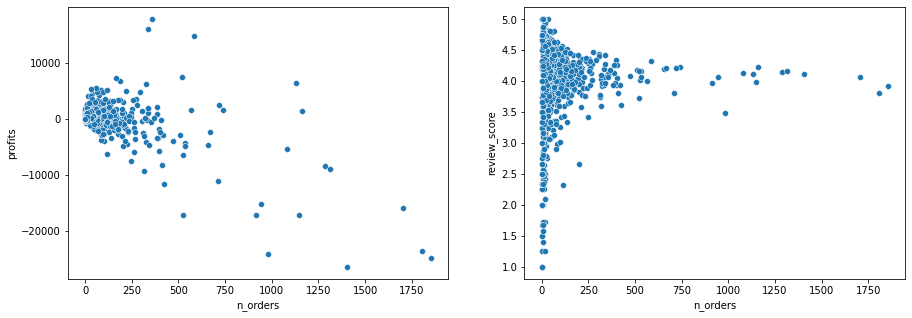

In [44]:
fig,axes=plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x='n_orders', y='profits', data=sellers_3 ,ax=axes[0])
sns.scatterplot(x='n_orders', y='review_score', data=sellers_3, ax=axes[1]);

n_orders higher and average(review_score) higher 
but profits are the more disastrous

- `n_orders` (_int_) _The number of unique orders the seller was involved with._
- `review_score` (_float_) _The average review score for orders in which the seller was involved_
- `sales` (_float_) _The total sales associated with this seller (excluding freight value)_ in BRL







In [46]:
len(sellers_3['seller_id'].unique()) == len(olist_costs['seller_id'].unique()) # 2970

True

In [47]:
#round( 
   #  ( (sellers_2['n_orders'].sum())** (.5) ), 2 )

In [48]:
olist_costs.head(2)

,seller_id,costs
0,0015a82c2db000af6aaaf3ae2ecb0532,100
1,001cca7ae9ae17fb1caed9dfb1094831,4490


In [49]:
seller_3 = sellers_2.copy()
seller_3.head(2)

,seller_id,n_orders,revenues,costs_x,active_months,sales,profits,costs_y
0,3442f8959a84dea7ee197c632cb2df15,3,328.999525,140,3.839119,218.70,188.999525,140
1,d1b65fc7debc3361ea86b5f14c68d2e2,40,2313.008599,140,14.283770,11703.07,2173.008599,140


In [ ]:
'''def average_review_to_price(review_score): # float
    d = {1 : 100, 2 : 50, 3 : 40, 4 : 0, 5: 0}
    if d >= 1 and d < 2:
        return 100
    if d >= 2 and d < 3:
        return 50
    if d >= 3 and d < 3:
        return 50
    
    return d[review_score]'''

## Desicion_for_sellers

In [50]:
sellers_1.head(2)

,seller_id,date_first_sale,date_last_sale,sales,n_orders,active_months,revenues
0,3442f8959a84dea7ee197c632cb2df15,2017-05-05 16:25:11,2017-08-30 12:50:19,218.70,3,3.839119,328.999525
1,d1b65fc7debc3361ea86b5f14c68d2e2,2017-03-29 02:10:34,2018-06-06 20:15:21,11703.07,40,14.283770,2313.008599


In [83]:
sellers_rate_price = sellers_1. copy()

sellers_rate_price['active_months'] = \
          (sellers_rate_price['date_last_sale'] - sellers_rate_price['date_first_sale']) \
                  / np.timedelta64(1,'M')

sellers_rate_price['revenues'] = sellers_rate_price['sales'].map(lambda x : .15*x) \
                       + sellers_rate_price['active_months']*80

total_revenues_rate_price = sellers_rate_price['revenues'].sum()

total_costs = olist_costs['costs'].sum() # remaining costs 
profits_rate_price =  total_revenues_rate_price - total_costs

IT_costs = 500_000

In [84]:
print("Revenues for all sellers 15%:", total_revenues_rate_price)
print( " The total resulting profits 15%: ", round(profits_rate_price, 2))
print("The final resulting profits 15%: ",  round(profits_rate_price - IT_costs, 2))

Revenues for all sellers 15%: 3465871.8262827117
 The total resulting profits 15%:  1571261.83
The final resulting profits 15%:  1071261.83


In [85]:
print("Revenues for all sellers 10%:", total_revenues)
print( " The total resulting profits 10%: ", round(profits, 2))
print("The final resulting profits 10%: ",  round(profits - IT_costs, 2))

Revenues for all sellers 10%: 2787744.214282712
 The total resulting profits 10%:  -213
The final resulting profits 10%:  -500213


### Recap 

- Recap :
    - IT_costs :  ***500_000    BRL***
    - Costs "bad reviews" :  ***1_894_610    BRL***
    - Revenues (10%):  <span style="color:blue">  2_787_744    BRL</span>
     - Revenues (15%):  <span style="color:blue">  3_465_871    BRL</span>
    - The resulting profits for all sellers (10%):  <span style="color:green">  893_134   BRL</span>
     - The resulting profits for all sellers (15%):  <span style="color:green">  1_571_261   BRL</span>
    - The final resulting profits (incl. ,IT 10%):   <span style="color:red">  393_134    BRL</span> 
     - The final resulting profits (incl. ,IT 15%):   <span style="color:red">  1_071_261    BRL</span> 

In [76]:
product_price = [ 10, 20, 200]
n_orders = 3
review_scores =  [ 3, 5, 1]   #----> #average(review_score) = 3

cost_ex = 40 + 0 + 100  
costs_ex = 140
revenues_ex = sum([ 1,  2, 20])
revenues_ex = 23
profits = 23 - 140 
profits = -117

In [ ]:
product_price = [ 10, 20, 200]
n_orders = 3
review_scores =  [ 3, 4, 2]   #----> #average(review_score) = 3

cost_ex = 3*40  + 0 + 2*50
costs_ex = 220
revenues_ex = sum([ 1,  2, 20])
revenues_ex = 23
profits = 23 - 220 
profits = -197

In [81]:
product_price = [ 10, 20, 20]
n_orders = 3
review_scores =  [ 3, 4, 2]  # -----> #average(review_score) = 5

cost_ex = 3*40  + 0 + 2*50
costs_ex = 220

revenues_ex = sum([ 3,  2, 2])
revenues_ex = 7 - 220
profits = -213

In [78]:
product_price = [ 30, 40, 50]
n_orders = 3
review_scores =  [ 5, 5, 5]  # -----> #average(review_score) = 5

cost_ex = 0 
revenues_ex = sum([ 3,  4, 5])
revenues_ex = 12 - 0
profits = 12

In [53]:
order_items = data['order_items']  #  we found 'order_id', 'seller_id' and 'price' columns
#order_items.head(2)

In [54]:
order_reviews = data['order_reviews'] #  we found 'order_id', 'seller_id' and 'review_score' columns
#order_reviews.head(2)

sellers_1 -- columns --> seller_id, date_first_sale, date_last_sale, sales, active_months, revenues

In [59]:
desicion_for_sellers = \
             order_reviews.merge( order_items, on = "order_id") \
                        .merge(sellers_1, on = 'seller_id') \
                            [
                                ['seller_id', 'order_id', 'active_months', 'review_score', 'price'] 
                            ]
desicion_for_sellers.head(1)

,seller_id,order_id,active_months,review_score,price
0,6d803cb79cc31c41c4c789a75933b3c7,73fc7af87114b39712e6da79b0a377eb,10.402773,4,185.0


In [60]:
desicion_for_sellers['revenues'] = desicion_for_sellers['price'].map(lambda x: .1 * x)  \
            +  desicion_for_sellers['active_months']*80

desicion_for_sellers['cost_review_score'] = \
                            desicion_for_sellers['review_score'].map(review_to_price)

desicion_for_sellers['profits_all_reviews'] = \
                desicion_for_sellers['revenues'] - desicion_for_sellers['cost_review_score']

desicion_for_sellers = desicion_for_sellers[ ['seller_id', 'profits_all_reviews'] ]

In [61]:
desicion_for_sellers.head(3)

,seller_id,profits_all_reviews
0,6d803cb79cc31c41c4c789a75933b3c7,850.72185
1,6d803cb79cc31c41c4c789a75933b3c7,850.72185
2,6d803cb79cc31c41c4c789a75933b3c7,845.72185


In [62]:
desicion_for_sellers[['seller_id', 'profits_all_reviews']].tail(3)

,seller_id,profits_all_reviews
113110,dcb7367a92f5ffb89f1e2152ed260285,7.99
113111,61c36f0fc4a47f9532e5512b66668e62,-25.00
113112,d3e7d37c0df9aef383f3f2a15b0dddfb,16.10


In [63]:
decision0 = desicion_for_sellers[['seller_id', 'profits_all_reviews']].groupby('seller_id') \
                                                 .sum().reset_index()

#         decision    ---- shape --->   (2970, 2)
decision0.head(2)

,seller_id,profits_all_reviews
0,0015a82c2db000af6aaaf3ae2ecb0532,334.592756
1,001cca7ae9ae17fb1caed9dfb1094831,326126.415889


In [198]:
#decision.sort_values(by='profits_all_reviwes')

- **we merge decision0 with profits_seller, the resulting profits associated with bad reviewes per seller (already get above)**

In [64]:
profits_seller.head(2)
#           profits_seller.shape   ---- shape ---> (2970, 4)

,seller_id,n_orders,revenues,costs,active_months,sales,profits
0,3442f8959a84dea7ee197c632cb2df15,3,328.999525,140,3.839119,218.70,188.999525
1,d1b65fc7debc3361ea86b5f14c68d2e2,40,2313.008599,140,14.283770,11703.07,2173.008599


In [65]:
decision = decision0.merge(profits_seller, on='seller_id', how = 'inner')
decision = decision[['seller_id', 
          'profits_all_reviews',
          'profits']]
decision.head(5)              #sort_values(by='profits_all_reviewes', ascending= False).head(5)

,seller_id,profits_all_reviews,profits
0,0015a82c2db000af6aaaf3ae2ecb0532,334.592756,223.864252
1,001cca7ae9ae17fb1caed9dfb1094831,326126.415889,-607.066402
2,002100f778ceb8431b7a1020ff7ab48f,29999.063209,-333.271014
3,003554e2dce176b5555353e4f3555ac8,12.000000,12.000000
4,004c9cd9d87a3c30c522c48c4fc07416,214188.569252,56.432312


In [241]:
print( round( decision.profits_all_reviews.sum(), 2) , round( decision.profits.sum(), 2) )

123287092.38 893134.21


- **total profits for all reviewes scores :** 123_287_092
- **total profits for bad reviewes        :**  893_134

Recap :
- Revenues : 2_787_744 BRL
- Costs "bad reviews" : 1_894_610 BRL
- The resulting profits for bad reviewes : 893_134 BRL
- IT_costs : 500_000 BRL
- The final resulting profits : 393_134 BRL
- total profits for all reviewes scores : 123_287_092